<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
پاییز ۱۳۹۸
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی بخش هفتم
            	<br/>
			</font>
طراح: متین خواجوی، آترین آریا
			<br/><br/>
موعد تحویل:  ساعت ۲۳:۵۹  
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

نام و نام خانوادگی

In [ ]:
شماره دانشجویی

نام افرادی که با آنها مشورت کرده اید

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال اول
        </font>
        <hr/>
        داده‌ی Weight-Height شامل قد (بر حسب inch)، وزن (بر حسب pound) و جنسیت ۱۰۰۰ نفر است. در این تمرین می‌خواهیم با استفاده از Chi-Square goodness of fit test بررسی کنیم که آیا قد این افراد از توزیع نرمال پیروی می‌کند یا خیر. آلفا را ۰.۰۵ در نظر بگیرید. 
        <br>
                در این تمرین حق استفاده از حلقه را ندارید و باید با استفاده از ابزار‌های برداری خود R سوال را حل کنید. همچنین امکان استفاده از توابع آماده برای آزمون فرض مانند ()chisq.test را نیز ندارید.
        <br>
        ابتدا فرض صفر و فرض جایگزین را بیان کنید. سپس آماره‌ی $\chi_0^2$ را محاسبه کنید.
          برای این کار داده‌ها را به ۱۰ بازه تقسیم کنید و طول بازه‌ها را طوری تعیین کنید که احتمال همه‌ی بازه‌ها برابر شود.
        <br>
        راهنمایی: در بین توابع مربوط به توزیع های احتمالاتی،
        خروجی آن دسته توابعی که نامشان
        با
        q
        آغاز میشد، چه بود و چه کاری انجام میدادند؟
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        فرض صفر: داده‌ها از توزیع نرمال پیروی می‌کنند.
        <br>
        فرض جایگزین: داده‌ها از توزیع نرمال پیروی نمی‌کنند.
    </font>
</div>

In [10]:
library(tidyverse)

f <- function(x, h) {
  return(sum(h >= x[1] & h < x[2]))
}

g <- function(x, ex) {
  return((x-ex)*(x-ex)/ex)
}

data <- read_csv('./weight-height.csv')
height <- data$Height
nmean <- mean(height)
nstd <- sd(height)
v <- qnorm(seq(from = 0, to = 1, by = 1/10), mean = nmean, sd = nstd)
v <- cbind(v[-length(v)], v[-1])
count <- apply(v, 1, f, h = height)
e <- length(height) / 10
val <- sum(sapply(count, g, ex = e))
val

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Gender = col_character(),
  Height = col_double(),
  Weight = col_double()
)


[1] 8.78

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال به اندازه‌ی کافی از توزیع chi-square مورد نظر نمونه بگیرید و نمودار آن را رسم کنید. در این نمودار ناحیه‌ای را که مربوط به نمونه‌های شدیدتر از آماره‌ی محاسبه شده است را مشخص کنید. سپس با استفاده از آماره‌ی محاسبه شده مقدار p-value را محاسبه کنید و با استفاده از آزمون فرض ذکر شده، فرض صفر خود را بسنجید.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        از آن‌جایی که ۰.۲۶ از ۰.۰۵ بیشتر است پس نمی‌توانیم فرض صفر را رد کنیم. پس این فرض که داده‌ها از توزیع نرمال پیروی می‌کنند رد نمی‌شود.
    </font>
</div>

[1] 0.2688395

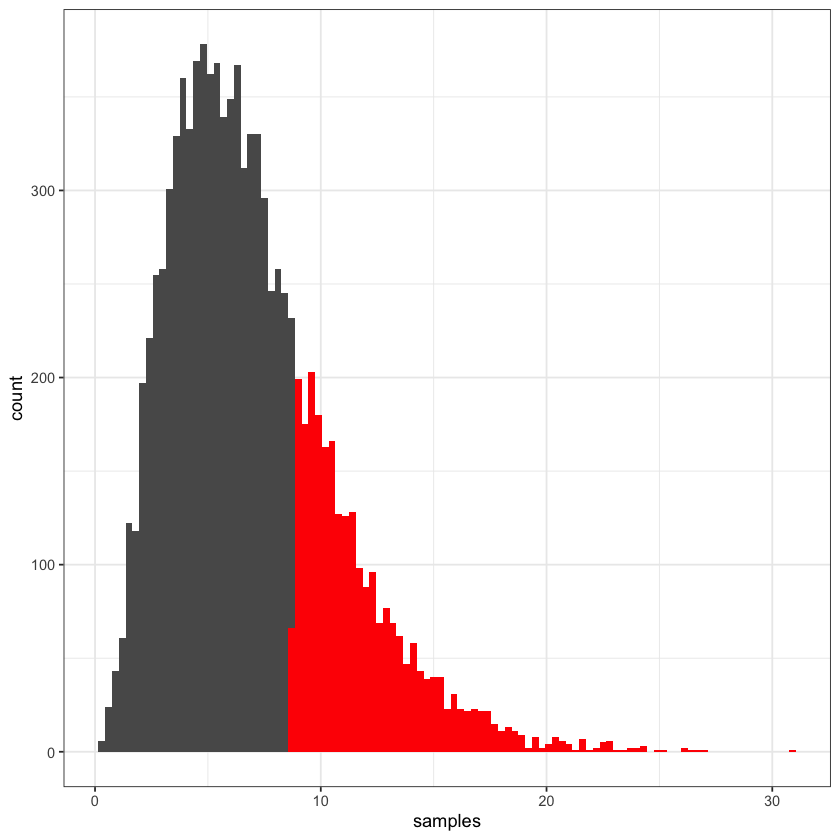

In [19]:
samples <- rchisq(10000, df = 7)
extreme <- samples[samples >= val]
ggplot() + geom_histogram(mapping = aes(x = samples), binwidth = 0.3) + geom_histogram(mapping = aes(x = extreme) , fill = 'red', binwidth = 0.3)  + theme_bw()
pvalue = pchisq(val, df = 7, lower.tail = FALSE)
pvalue

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال دوم
        </font>
        <hr/>
        در این تمرین با رویکرد بیزی بیشتر آشنا می‌شویم.
        <br>
        در این تمرین حق استفاده از حلقه را ندارید و باید با استفاده از ابزار‌های برداری خود R سوال را حل کنید.
        <br>
        تنها قسمتی که در آن حق استفاده از لایبرری LearnBayes را دارید قسمت اول سوال است. امکان استفاده از لایبرری‌های آماده‌ی دیگر نیست.
        <br>
        می‌خواهیم ببینیم چند درصد از سفرهایی که در تهران انجام می‌شود زیر نیم ساعت طول می‌کشد. به این منظور از سه نفر خواسته‌ایم این مقدار را تخمین بزنند.
        <br>
        نفر اول و دوم از آن‌جایی که با توزیع بتا آشنایی دارند حدس خود را با استفاده از این توزیع بیان می‌کنند. حدس نفر اول این است که مقدار مورد نظر نزدیک ۰.۲ است و احتمال این که مقدار مورد نظر از ۰.۵ بیشتر شود برابر ۰.۲ است و احتمال این که مقدار مورد نظر از ۰.۱ کمتر شود برابر ۰.۰۵ است. حدس نفر دوم این است که مقدار مورد نظر حدود ۰.۹ است و احتمال این که این مقدار از ۰.۸ کمتر باشد برابر ۰.۰۱ است و احتمال این که این مقدار از ۰.۹۵ بیشتر شود ۰.۱ است. پارامترهای توزیع بتای مربوط به هر کدام از حدس‌ها را طوری بیابید که توزیع نهایی تا حد ممکن به باور افراد نزدیک باشد. می‌توانید از تابع ()beta.select در LearnBayes نیز استفاده کنید.
        <br>
        راهنمایی: سعی کنید تابعی تعریف کنید که آلفا و بتا را به عنوان ورودی بگیرد و عدد خروجی نشان‌دهنده‌ی میزان نزدیک بودن این توزیع به توزیع مورد نظر باشد. هدف مینیموم کردن این تابع است. 
    </font>
</div>

In [65]:
library(LearnBayes)
library(ggplot2)

objective.function1 <- function(params) {
  alpha <- params[1]
  beta <- params[2]
  
  intended.quantiles <- c(0.1, 0.5)
  calculated.quantiles <- qbeta(p=c(0.05, 0.8), shape1=alpha, shape2=beta)
  squared.error.quantiles <- sum((intended.quantiles - calculated.quantiles)^2)
  
  intended.mode <- 0.2
  calculated.mode <- calculate.mode(alpha, beta)
  squared.error.mode <- (intended.mode - calculated.mode)^2
  
  return(squared.error.quantiles + squared.error.mode)
}

objective.function2 <- function(params) {
  alpha <- params[1]
  beta <- params[2]
  
  intended.quantiles <- c(0.8, 0.95)
  calculated.quantiles <- qbeta(p=c(0.01, 0.9), shape1=alpha, shape2=beta)
  squared.error.quantiles <- sum((intended.quantiles - calculated.quantiles)^2)
  
  intended.mode <- 0.9
  calculated.mode <- calculate.mode(alpha, beta)
  squared.error.mode <- (intended.mode - calculated.mode)^2
  
  return(squared.error.quantiles + squared.error.mode)
}

calculate.mode <- function(alpha, beta) {
  return((alpha-1) / (alpha+beta-2))
}

p1.quantile1=list(p=.05, x=0.1)
p1.quantile2=list(p=.8, x=0.5)
p1.starting.params <- beta.select(p1.quantile1, p1.quantile2)
nlm.result1 <- nlm(f = objective.function1, p = p1.starting.params)
p1.optimal.alpha <- nlm.result1$estimate[1]
p1.optimal.beta <- nlm.result1$estimate[2]
c(p1.optimal.alpha, p1.optimal.beta)

p2.quantile1=list(p=.01, x=0.8)
p2.quantile2=list(p=.9, x=0.95)
p2.starting.params <- beta.select(p2.quantile1, p2.quantile2)
nlm.result2 <- nlm(f = objective.function2, p = p2.starting.params)
p2.optimal.alpha <- nlm.result2$estimate[1]
p2.optimal.beta <- nlm.result2$estimate[2]
c(p2.optimal.alpha, p2.optimal.beta)

[1] 1.667181 3.432239

[1] 63.223168  7.226312

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        نفر سوم با توزیع بتا آشنایی ندارد. او حدس خود را به این صورت بیان می‌کند:
        <br>
        احتمال اینکه مقدار مورد نظر در بازه‌های 
        $(0, 0.1), (0.1, 0.2), ..., (0.9, 1)$ 
   باشد به ترتیب متناسب است با 
   $1, 1, 1, 1, 2, 3, 3, 5, 4, 2$. برای مدل کردن این توزیع ۱۰۰۰ نقطه در بازه‌ی ۰ تا ۱ در نظر بگیرید. سپس مقدار pdf متناظر با هر کدام از این نقاط را به دست آورید. این مقادیر را در متغیر prior نگه‌دارید.
    </font>
</div>

In [66]:
p = seq(0, 1, length = 1000)
prior <- c(rep(c(1), 400), rep(c(2), 100), rep(c(3), 200), rep(c(5), 100), rep(c(4), 100), rep(c(2), 100))
prior <- prior / sum(prior)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        توزیع‌های prior متناظر با این سه نفر را در یک نمودار رسم کنید. واریانس تخمینی این توزیع‌ها را نیز به دست آورید.
    </font>
</div>

[1] 0.03607272

[1] 0.001272542

[1] 0.05929598

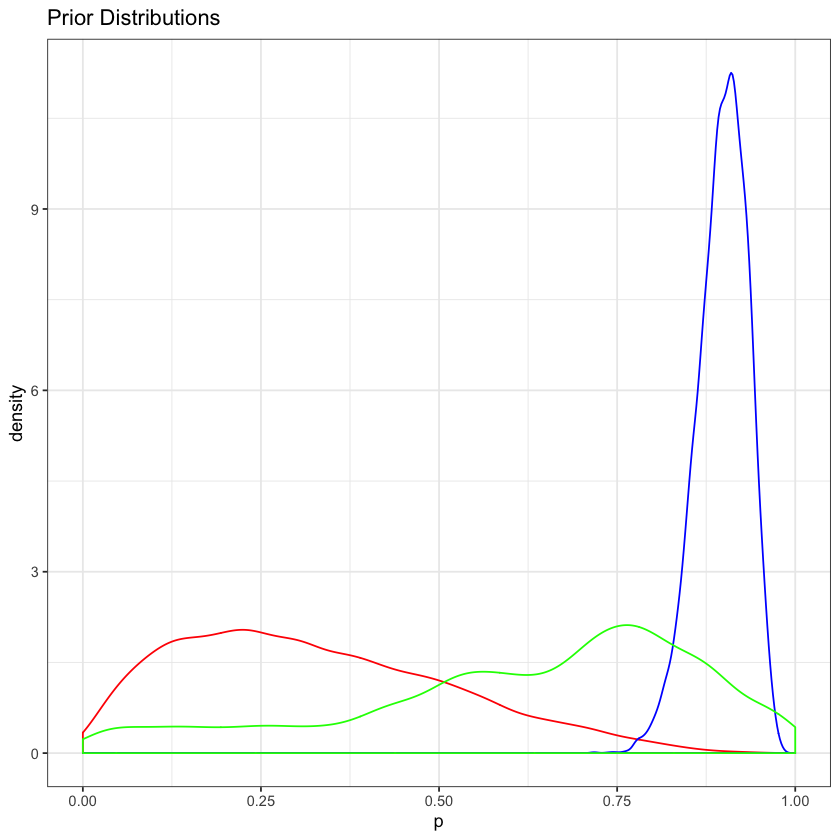

In [67]:
samples1 <- rbeta(10000, p1.optimal.alpha, p1.optimal.beta)
samples2 <- rbeta(10000, p2.optimal.alpha, p2.optimal.beta)
samples3 <- sample(p, size = 10000, replace = TRUE, prob = prior)
var(samples1)
var(samples2)
var(samples3)
ggplot() + geom_density(mapping = aes(x = samples1), color = 'red') + geom_density(mapping = aes(x = samples2), color = 'blue') + geom_density(mapping = aes(x = samples3), color = 'green') + theme_bw() + labs(title = 'Prior Distributions', x = 'p')

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال داده‌های زمان مربوط به ۵۰ سفر در اختیارمان قرار داده شده است. زمان ۲۰ سفر از نیم ساعت کمتر بوده است. posterior مربوط به هر سه نفر را به دست آورید و از آن‌ها به اندازه‌ی کافی نمونه بگیرید. با استفاده از نمونه‌ها توزیع posterior مربوط به هر سه نفر را در یک نمودار رسم کنید. واریانس تخمینی این توزیع‌ها را نیز به دست آورید. سپس تخمین MAP هر سه نفر را از روی posterior به دست بیاورید. دلیل برخی تفاوت‌ها در این تخمین‌ها چیست؟ توضیح دهید.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        همان‌طور که می‌بینید تخمین نفر اول و سوم به تخمین ML نزدیک شده‌اند. زیرا همان‌طور که در قسمت قبل دیده شد prior آن‌ها واریانس زیادی داشت و فرد اطمینان زیادی از حدس خود نداشت. اما نفر دوم بر روی حدس خود اطمینان زیادی داشته است و واریانس توزیع نفر دوم کم بوده است. چون تعداد داده‌ها زیاد نیست، تخمین نفر دوم برخلاف نفر اول و سوم به تخمین ML نزدیک نمی‌شود. این نشان‌دهنده‌ی اهمیت انتخاب Prior و تاثیر آن بر روی تخمین نهایی است. به خصوص زمانی که تعداد داده‌ها زیاد نباشد.
    </font>
</div>

[1] 0.004209367

[1] 0.001720686

[1] 0.004627147

[1] 0.3945669

[1] 0.6914456

[1] 0.4190001

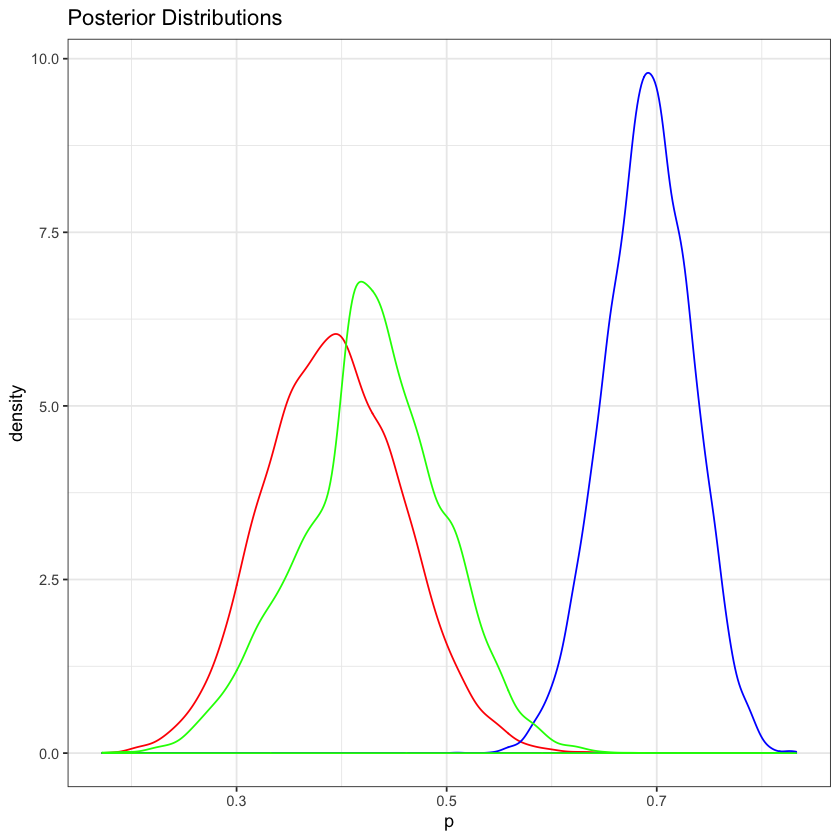

In [68]:
p1.optimal.alpha <- p1.optimal.alpha + 20
p1.optimal.beta <- p1.optimal.beta + 30
p2.optimal.alpha <- p2.optimal.alpha + 20
p2.optimal.beta <- p2.optimal.beta + 30
likelihood <- dbeta(p, 21, 31)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples1 <- rbeta(10000, p1.optimal.alpha, p1.optimal.beta)
samples2 <- rbeta(10000, p2.optimal.alpha, p2.optimal.beta)
samples3 <- sample(p, size = 10000, replace = TRUE, prob = posterior)
var(samples1)
var(samples2)
var(samples3)
ggplot() + geom_density(mapping = aes(x = samples1), color = 'red') + geom_density(mapping = aes(x = samples2), color = 'blue') + geom_density(mapping = aes(x = samples3), color = 'green') + theme_bw() + labs(title = 'Posterior Distributions', x = 'p')
density(samples1)$x[which.max(density(samples1)$y)]
density(samples2)$x[which.max(density(samples2)$y)]
density(samples3)$x[which.max(density(samples3)$y)]

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال ۱۲۵۰۰ داده‌ی دیگر در اختیارمان قرار می‌گیرد. ۴۵۰۰ سفر از ۱۲۵۰۰ سفر زیر نیم ساعت بوده‌اند. مانند قسمت قبل posterior را به دست آورده، از آن نمونه بگیرید و واریانس تخمینی هر سه توزیع را به دست آورید. با دیدن داده واریانس چه تغییری می‌کند؟ حال تخمین MAP هر سه نفر را به دست آورید. در آخر این تخمین‌ها را با تخمین ML داده‌ها مقایسه کنید و نتایج مشاهدات خود را شرح دهید.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        همان‌طور که دیده می‌شود با دیدن داده واریانس کاهش می‌یابد. وقتی تعداد داده‌ها زیاد می‌شود تخمین هر سه نفر به تخمین ML که برابر 
        $\frac{4520}{12550} \approx 0.36016$
   است نزدیک می‌شود و prior نقش خود را در تخمین نهایی از دست می‌دهد.
    </font>
</div>

[1] 1.81827e-05

[1] 1.858755e-05

[1] 1.827038e-05

[1] 0.3606314

[1] 0.3632374

[1] 0.360251

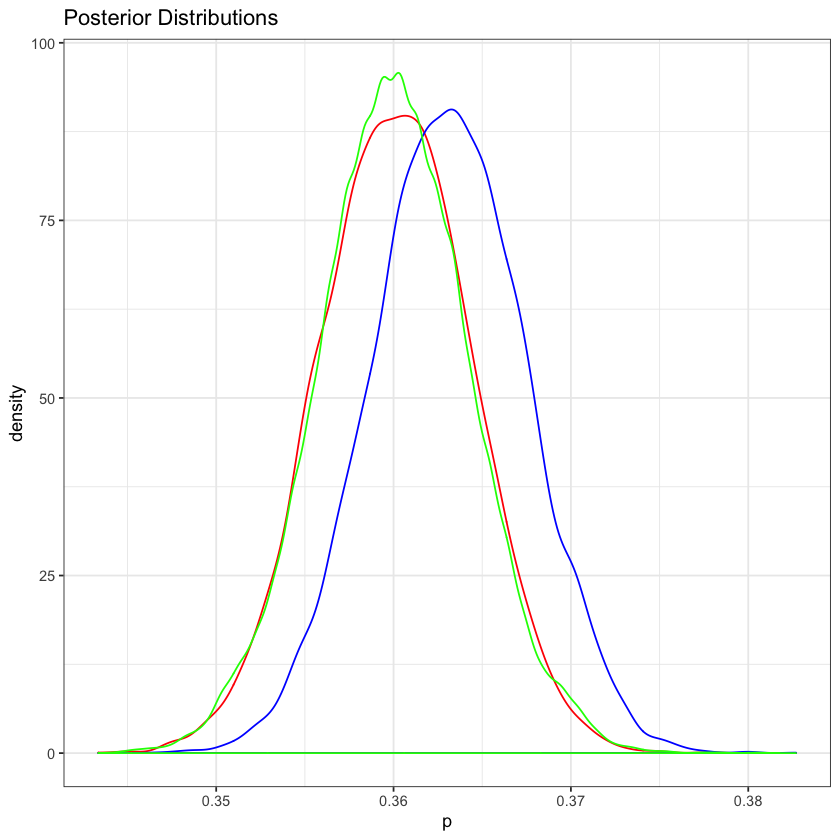

In [69]:
p1.optimal.alpha <- p1.optimal.alpha + 4500
p1.optimal.beta <- p1.optimal.beta + 8000
p2.optimal.alpha <- p2.optimal.alpha + 4500
p2.optimal.beta <- p2.optimal.beta + 8000
likelihood <- dbeta(p, 4501, 8001)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples1 <- rbeta(10000, p1.optimal.alpha, p1.optimal.beta)
samples2 <- rbeta(10000, p2.optimal.alpha, p2.optimal.beta)
samples3 <- sample(p, size = 10000, replace = TRUE, prob = posterior)
var(samples1)
var(samples2)
var(samples3)
ggplot() + geom_density(mapping = aes(x = samples1), color = 'red') + geom_density(mapping = aes(x = samples2), color = 'blue') + geom_density(mapping = aes(x = samples3), color = 'green') + theme_bw() + labs(title = 'Posterior Distributions', x = 'p')
density(samples1)$x[which.max(density(samples1)$y)]
density(samples2)$x[which.max(density(samples2)$y)]
density(samples3)$x[which.max(density(samples3)$y)]

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            سوال سوم
        </font>
        <hr/>
        در این تمرین می‌خواهیم به پیاده‌سازی رگرسیون خطی ساده بپردازیم.
        <br>
        در این تمرین حق استفاده از حلقه را ندارید و باید با استفاده از ابزار‌های برداری خود R سوال را حل کنید.
        <br>
        حق استفاده از توابع آماده رگرسیون را نیز ندارید.
        <br>
        داده مورد استفاده در این تمرین، داده Advertising می‌باشد.
        <br>
        این داده اطلاعات میزان فروش یک کالا را بر اساس میزان هزینه‌های متفاوتِ تبلیغات در رادیو ، روزنامه و تلویزیون دارد و ما به عنوان یک مشاور فروش می‌خواهیم برنامه‌ای برای تبلیغات سال بعد ارائه کنیم.
        <br><br>
        می‌خواهیم میزان فروش را بر اساس رادیو دریابیم. اگر میزان فروش Y و X تبلیغ در رادیو باشد:
        <br>
        Y را به صورت $Y \approx \beta_0 + \beta_1 X$ مدل می‌کنیم.
        <br>
        <br>
        حال ما می‌خواهیم $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$ را بدست‌آوریم.
        <br>
        در بخش اول، داده را بخوانید و با پیاده کردن روش کمترین مربعات مقادیر $\hat{\beta_0}$ و $\hat{\beta_1}$ را بدست‌آورید.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
     حال با داشتن $\hat{\beta_0}$ و $\hat{\beta_1}$ ، استاندارد ارور هریک از این پارامتر هارا محاسبه کنید و در نهایت بازه اطمینان 95 درصدی برای هریک بسازید.   
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    حال t-statistic را برای هر یک محاسبه کنید و با ساخت یک آزمون فرض بگویید که آیا هر یک از این مقادیر تاثیری در پیشبینی Y دارند یا خیر.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    در نهایت با کمی تحقیق در مورد Prediction Interval ، مقدار فروش را برای X = 300 محاسبه کنید و بازه 95 درصدی حول آن بسازید.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    مقدار $R^2$ را بیابید. حال با دستور cor ، همبستگی رادیو و میزان فروش را بیابید. چه رابطه‌ای بین این دو مقدار وجود دارد ؟ توضیح دهید.
    </font>
</div>

In [ ]:
# cor(Advertising$sales, Advertising$radio)

